# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 1381 Ковалёв Павел Андреевич и Богданов Егор Михайлович. Вариант 5

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

1)
Единичный цифровой импульс:$$ \delta_d(k) = \begin{cases} 1, k = 0 \\ 0, k \ne 0 \end{cases} $$


2)
Дискретный единичный скачок:$$\tau_d(k) = \begin{cases} 1, k \geqslant  0 \\ 0, k < 0 \end{cases}$$

3)
Дискретная экспоненциальная функция:
$$s_1(k) = \begin{cases}  a^k,k\geqslant 0\\0,k<0\end{cases}$$

4)
Дискретный комплексный гармонический сигнал:
$$s_2(k)=Ce^{j \hat{\omega_0} k}$$


## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

Вариант 5
| Параметр | значение     |
|------|--------|
| N    |30      |
| T    | 0.0015 |
| C    | 1      |
| W0   | Pi/6   |
| M    | 5      |
|  a  | -0.825 |

## Выполнение работы

### Задание 1


Смоделировать единичный цифровой импульс $$\delta_d(k)$$с выводом графиков на интервале дискретного времени $$nT∈[0,(N−1)T]$$ и дискретного нормированного времени $$n∈[0,N−1]$$ Пояснить:

a.взаимосвязь между дискретным и дискретным нормированным временем;

b.различие между единичным цифровым импульсом и дельта-функцией.


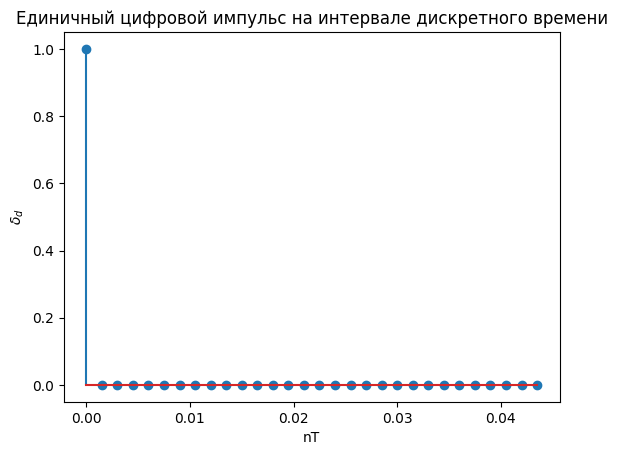

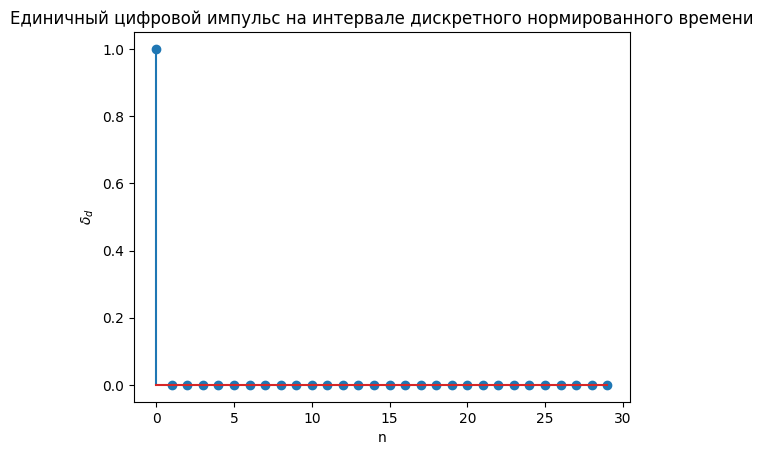

In [6]:
import matplotlib.pyplot as plt


N=30
T=0.0015
C=1
Pi=3.1415926
W0=Pi/6
m=5
a=-0.825

def deltad(k):
    return 1 if k==0 else 0

X=[]
Y=[]
Xn=[]
Yn=[]
for n in range (N):
    X.append(n*T)
    Y.append(deltad(n*T))
    Xn.append(n)
    Yn.append(deltad(n*T))

plt.stem(X,Y)
plt.title("Единичный цифровой импульс на интервале дискретного времени")
plt.xlabel("nT")
plt.ylabel(r'$\delta_d$')

plt.show()

plt.stem(Xn,Yn)
plt.title("Единичный цифровой импульс на интервале дискретного нормированного времени")
plt.xlabel("n")
plt.ylabel(r'$\delta_d$')
plt.show()

a.взаимосвязь между дискретным и дискретным нормированным временем:
$$n=\frac{nT}{T}=\frac{t}{T}$$

b.различие между единичным цифровым импульсом и дельта-функцией:
Единичный цифровой импульс—дискретный аналог дельта-функции:
$$\delta_d(t) = \begin{cases} \infty , t = 0 \\ 0, t  \ne0 \end{cases} $$
В 0 значение 1,а не бесконечность. Область определения—целые числа 


### Задание 2
Смоделировать дискретный единичный скачок $$\sigma_d(k)$$ с выводом графиков на интервале дискретного времени $$nT∈[0,(N−1)T]$$ и дискретного нормированного времени 
$$ n∈[0,N−1]$$ 
Пояснить:

a)соответствие между дискретным и аналоговым единичными скачками;

b)чему равна частота дискретизации дискретного единичного скачка.


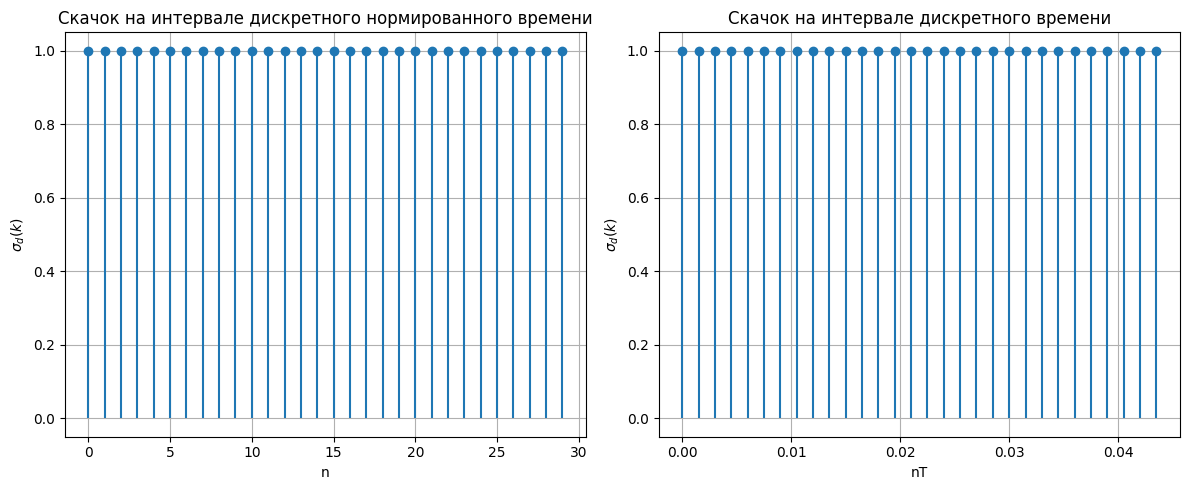

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Nb = 5  # Номер бригады
N = 30 + Nb % 5
T = 0.0005 * (1 + Nb % 3)
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))

n = np.arange(N)  # Дискретное нормированное время
t = n * T  # Дискретное время

def discrete_unit_step(k):
    return np.where(k >= 0, 1, 0)
    
sigma_d = discrete_unit_step(n)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))



axs[1].stem(t, sigma_d, basefmt=" ")
axs[1].set_title("Cкачок на интервале дискретного времени")
axs[1].set_xlabel("nT")
axs[1].set_ylabel("$σ_d(k)$")
axs[1].grid(True)
axs[0].stem(n, sigma_d, basefmt=" ")
axs[0].set_title("Cкачок на интервале дискретного нормированного времени")
axs[0].set_xlabel("n")
axs[0].set_ylabel("$σ_d(k)$")
axs[0].grid(True)
plt.tight_layout()
plt.show()


a)соответствие между дискретным и аналоговым единичными скачками:

Дискретный единичный скачок является дискретным аналогом функции единичного скачка(функции Хевисайда):
$$\delta_d(t) = \begin{cases} 1, t > 0 \\ 0.5  \text{ or not defined} , t = 0 \\0,t<0 \end{cases}$$

b)чему равна частота дискретизации дискретного единичного скачка:
$$f=\frac{1}{T}=\frac{1}{0.0015}\sim 667\text{ Hz}$$


### Задание 3

Смоделировать дискретную экспоненциальную функцию $$s_1(k)$$ с выводом графиков на интервале дискретного времени $$nT∈[0,(N−1)T]$$ и дискретного нормированного времени $$n∈[0,N−1]$$ Пояснить соответствие между дискретной и аналоговой экспонентами.

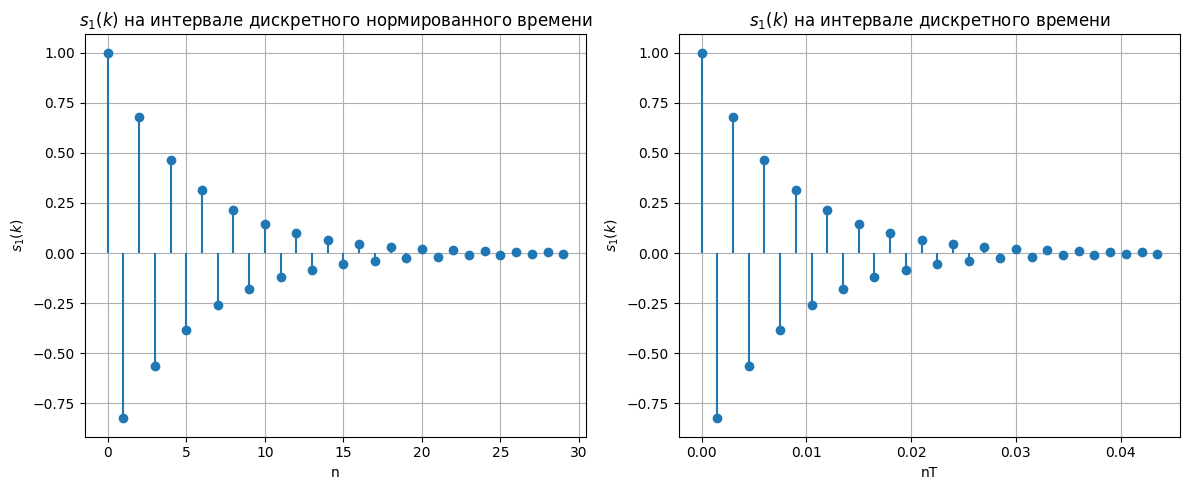

In [8]:

import numpy as np
import matplotlib.pyplot as plt

Nb = 5  # Номер бригады
N = 30 + Nb % 5
T = 0.0005 * (1 + Nb % 3)
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))

n = np.arange(N)  # Дискретное нормированное время 
t = n * T  # Дискретное время

def discrete_unit_step(k):
    return np.where(k >= 0, 1, 0)

def discrete_exponential(k, a):
    return a**k * discrete_unit_step(k)

sigma_d = discrete_unit_step(n)
s1 = discrete_exponential(n, a)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].stem(n, s1, basefmt=" ")
axs[0].set_title("$s_1(k)$ на интервале дискретного нормированного времени")
axs[0].set_xlabel("n")
axs[0].set_ylabel("$s_1(k)$")
axs[0].grid(True)

axs[1].stem(t, s1, basefmt=" ")
axs[1].set_title("$s_1(k)$ на интервале дискретного времени")
axs[1].set_xlabel("nT")
axs[1].set_ylabel("$s_1(k)$")
axs[1].grid(True)

plt.tight_layout()
plt.show()


Вид дискретной экспоненты оперделяется основанием "a" аналоговой экспоненты 

### Задание 4

Смоделировать дискретный комплексный гармонический сигнал $$s_2(k)=Ce^{j\hat{w_0}k}$$ с выводом графиков вещественной и мнимой частей на интервале времени $$n∈[0,N−1]$$ Записать данный сигнал в виде комбинации двух вещественных последовательностей.


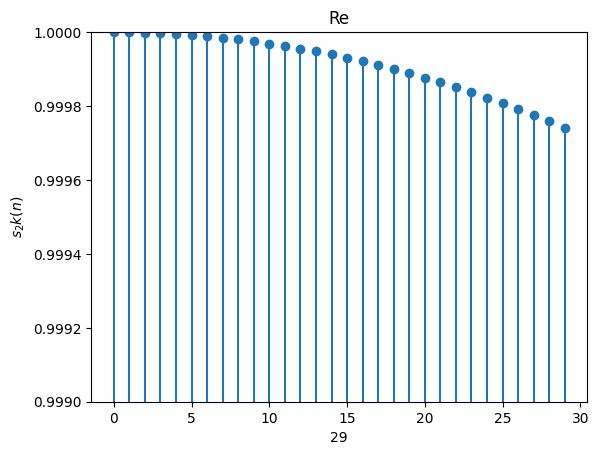

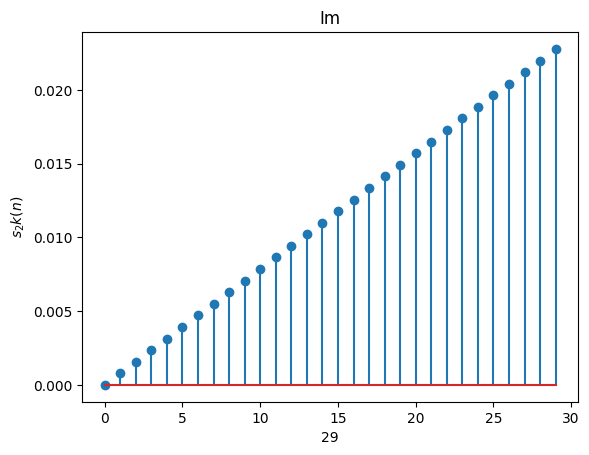

In [9]:
import matplotlib.pyplot as plt
import math as math

N=30
T=0.0015
C=1
Pi=3.1415926
W0=Pi/6
m=5
a=-0.825

def cos(k):
    return math.cos(W0*k)

def sin(k):
    return math.sin(W0*k)

Xre=[]
Yre=[]
Xim=[]
Yim=[]
for n in range (N):
    Xre.append(n)
    Yre.append(cos(n*T))
    Xim.append(n)
    Yim.append(sin(n*T))

plt.ylim(0.999,1)
plt.title("Re")
plt.xlabel(n)
plt.ylabel(r'$s_2k(n)$')
plt.stem(Xre,Yre)
plt.show()

plt.title('Im')
plt.xlabel(n)
plt.ylabel(r'$s_2k(n)$')
plt.stem(Xim,Yim)
plt.show()


Комбинация вещественных последовательностей:$$s_2(k)=Ce^{j\hat{w_0}k}=C*(cos(\hat{w_0}k)+jsin(\hat{w_0}k))=Ccos(\hat{w_0}k)+jCsin(\hat{w_0}k)$$

### Задание 5

Вывести графики последовательностей $$δ_d(k),σ_d(k), s_1(k)$$ задержанных на m отсчетов, на интервале времени $$n∈[0,N−1]$$ Записать формулы задержанных последовательностей.

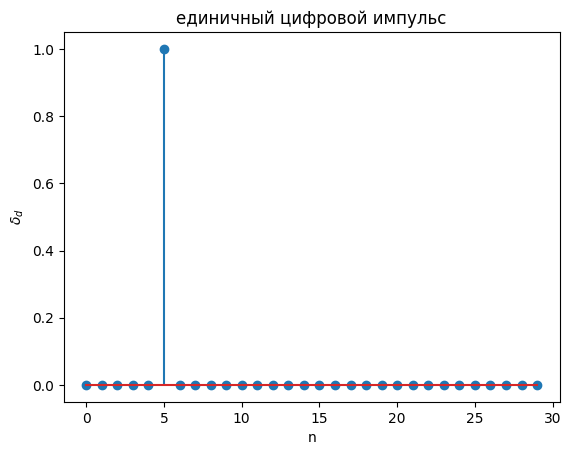

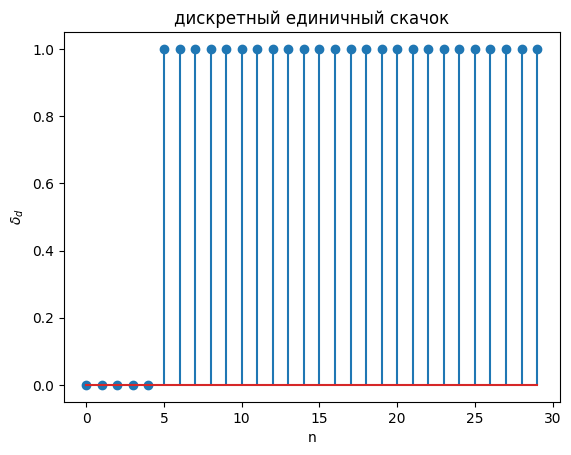

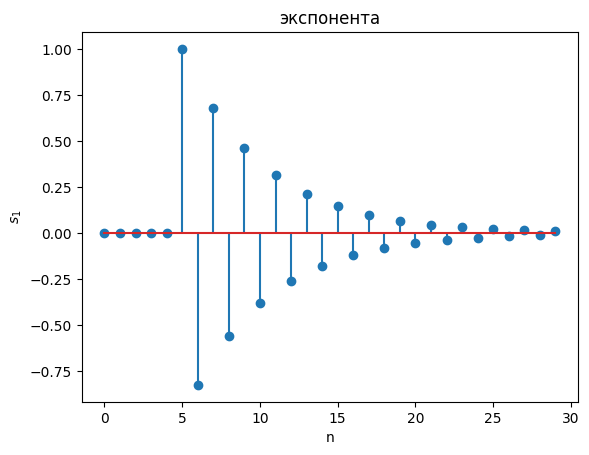

In [10]:
import matplotlib.pyplot as plt
import numpy as np

N=30
T=0.0015
C=1
Pi=3.1415926
W0=Pi/6
m=5
a=-0.825

def deltad(k):
    return 1 if k==m*T else 0

def sigmad(k):
    return 1 if k>=m*T else 0
    

def s1(k):
    return a**(k - m) if k >= m else 0 



Xsdp=[]
Ysdp=[]

Xdsj=[]
Ydsj=[]

Xde=[]
Yde=[]


Xde = []
Yde = []

for n in range (N):
    #единичный цифровой импульс
    Xsdp.append(n)
    Ysdp.append(deltad(n*T))
    #дискретный единичный скачок
    Xdsj.append(n)
    Ydsj.append(sigmad(n*T))
    #дискретная экспоненциальная функция
    Xde.append(n)
    Yde.append(s1(n))


plt.stem(Xsdp,Ysdp)
plt.title("единичный цифровой импульс")
plt.xlabel("n")
plt.ylabel(r'$\delta_d$')
plt.show()

plt.stem(Xdsj,Ydsj)
plt.title("дискретный единичный скачок")
plt.xlabel("n")
plt.ylabel(r'$\delta_d$')
plt.show()

plt.stem(Xde,Yde)
plt.title("экспонента")
plt.xlabel("n")
plt.ylabel(r'$s_1$')
plt.show()

Формулы:

1)
Задержанный единичный цифровой импульс: $$ \delta_d(k) = \begin{cases} 1, k = m \\ 0, k \ne m \end{cases}$$

2)
Задержанный дискретный единичный скачок:$$\tau_d(k) = \begin{cases} 1, k \geqslant  m \\ 0, k < m \end{cases}$$

3)
Задержанная дискретная экспоненциальная функция:
$$s_1(k) = \begin{cases}  a^{(k-m)},k\geqslant 0\\0,k<0\end{cases}$$


## Выводы
Были изучены математические описания стандартных дискретных сигналов и освоены программные средства их моделирования.

